In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('uber.csv')

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
data.shape

(53589, 9)

**DATA PREPROCESSING**

In [7]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [8]:
data.drop(columns='Unnamed: 0',inplace=True)

In [11]:
data=data.dropna()

In [12]:
data = data[data['fare_amount']> 0]
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:[x[0:10] for x in x.split(' ')])
data['pickup_datetime'] = data['pickup_datetime'].apply(lambda x:x[0])
data['pickup_datetime'] = pd.DatetimeIndex(data['pickup_datetime']).year

'''
data = data[data['fare_amount'] > 0]:

This line filters the dataset to remove rows where the 'fare_amount' is less than or equal to 0. It eliminates any rows with non-positive fare amounts.
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: [x[0:10] for x in x.split(' ')]):

This line appears to split the 'pickup_datetime' column and keep only the date portion (first 10 characters) of each datetime value. This can be useful for analyzing trends or patterns based on dates.
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x: x[0]):

This line seems to extract the first character from the date string, which corresponds to the year. It converts the date into the year portion.
data["pickup_datetime"] = pd.DatetimeIndex(data["pickup_datetime"]).year:

This line is attempting to convert the 'pickup_datetime' column into a datetime object and extract the year.
'''

In [14]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

In [16]:
X = data.drop(['fare_amount'],axis=1)
y = data['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.016963,-0.019794,0.020301,-0.021241,0.009050
pickup_longitude,0.016963,1.000000,-0.909274,0.850172,-0.868170,0.003271
pickup_latitude,-0.019794,-0.909274,1.000000,-0.901077,0.957681,-0.005238
dropoff_longitude,0.020301,0.850172,-0.901077,1.000000,-0.943760,0.002244
dropoff_latitude,-0.021241,-0.868170,0.957681,-0.943760,1.000000,-0.005053
passenger_count,0.009050,0.003271,-0.005238,0.002244,-0.005053,1.000000


**OUTLIER DETECTION**

<Axes: >

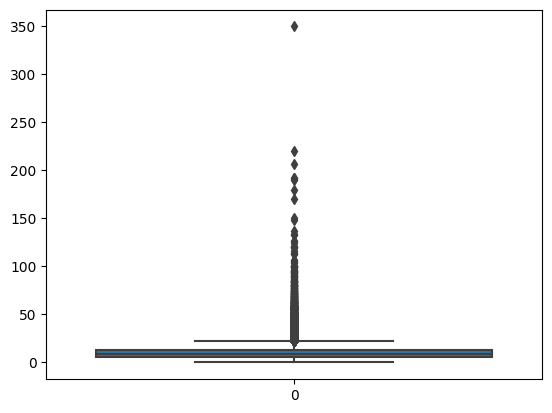

In [20]:
sns.boxplot(data['fare_amount'])

In [24]:
#removing the outlier
Q1 = np.percentile(data['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['fare_amount'],75, interpolation='midpoint')
print(Q1,Q3)

6.0 12.5


**Outlier Treatment**

In [25]:
data.drop(data[data['fare_amount'].values>12.5].index, inplace=True)

<Axes: >

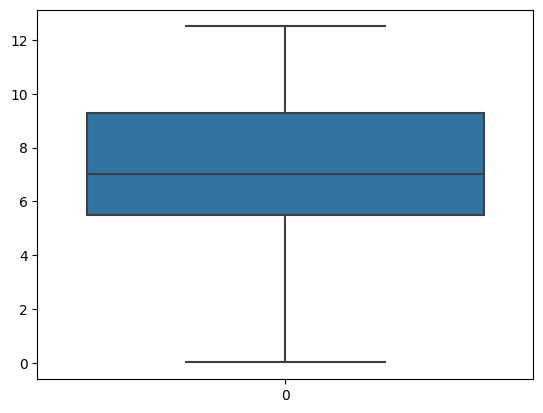

In [26]:
sns.boxplot(data['fare_amount'])

**LINEAR REGRESSION**

In [27]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)

In [32]:
from math import sqrt

def evaluate_model(y_true, y_pred, model_name):
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  print(f"{model_name} RMSE: {rmse:.2f}")
  print(f"{model_name} R-squared (R2): {r2:.2f}")

evaluate_model(y_test,y_pred,"Linear Regression")


Linear Regression RMSE: 10.27
Linear Regression R-squared (R2): 0.00


**RANDOM FOREST**

In [33]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [35]:
def evaluate_model(y_true, y_pred, model_name):
  rmse = sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  print(f"{model_name} RMSE: {rmse:.2f}")
  print(f"{model_name} R-squared (R2): {r2:.2f}")

evaluate_model(y_test,y_pred_rf,"Random Forest Regression")

Random Forest Regression RMSE: 5.20
Random Forest Regression R-squared (R2): 0.74
